# run

In [1]:
import importlib
import numpy as np
import matplotlib.pyplot as plt

from helpers import *
from implementations import *

%load_ext autoreload
%autoreload 2

REPOSITORY STRUCTURE

├───.ipynb_checkpoints
├───.jupyter
│   └───desktop-workspaces
├───dataset
└───__pycache__

The datset is stored in the dataset folder in the files x_train, x_test, y_train...

HOW TO RUN OUR PROJECT
To run our projects, you simply need to go through the notebook run.ipynb cells in the chronological order. The implementations are in the implementations.py file. We use some functions of the helpers.py provided for the labs. The submission-logistic_regerssion.csv file contains the last prediction made by the model. 




## Load dataset

In [2]:
# load data
data_path = 'dataset/'

# The dataset is subsampled to make it run faster
x_train, x_test, y_train, train_ids, test_ids = load_csv_data(data_path, sub_sample=False)
print("x_train :", x_train.shape )
print("y_train :", y_train.shape )
print("x_test :", x_test.shape )

x_train : (328135, 321)
y_train : (328135,)
x_test : (109379, 321)


## Preprocess and clean dataset

### Label composition

We start with checking the composition of the dataset. 

In [3]:
print("Proportion of unhealthy :", np.sum(y_train == 1)/len(y_train) * 100, "%")

Proportion of unhealthy : 8.830207079403294 %


The sample distribution is very unbalanced, we use downsampling to increase the proportion of unhealthy. This reduce further the sample size and provide a more balanced training set.

In [4]:
x_train_resampled, y_train_resampled = downsampling(x_train,y_train)

New proportion of unhealthy : 20.0 %


### Feature selection

To select useful features for model training, we perform following steps:

1. Delete the first 26 columns that are irrelevant

2. We then excluded all filling value like 99 or 9999, which represent "refused to respond". Those provide no useful information to the training, so we replace them as NaN.\
Those number are usually very high (77, 99, 9999, ...), in the dataset they will appear as outliers comparing to the other data in their respective feature column. We will use IQR method to identify and remove them from the features.

3. Features with too many NaNs give not enough informations, and may even increase the training error.\
First we visualize the quantity of NaNs in the dataset and how are they distributed.\
Columns with too many NaNs have to be deleted. To avoid losing too much information, we decide to keep some columns with a relatively low number of NaNs and will fill them up with numerical values later.

4. Before filling the remaining NaN values, we seperate continuous and categorical features: In order to differenciate them, we decide to through each features and observe how many different values are present. Columns that contain more than 25 possibles values (we use 25, to not included all questions related to how many days/month) are considered as columns with continuous features. There are a few exceptions like the sport that are categorical but contain more than 25 categories, but there are very rare, and unless to tidy the dataset manually, it is very difficult to identify them accurately.

5. To complete the NaNs, we proceed as follow :
- for the continuous features, we replace the NaNs with the mean values (NaNs excluded) of the column
- for categorical features, we replace them with the mode category of each column.

6. After filling NaNs, we normalize continuous features with z-score standardization and we encode catagorical features with one-hot-encoding.

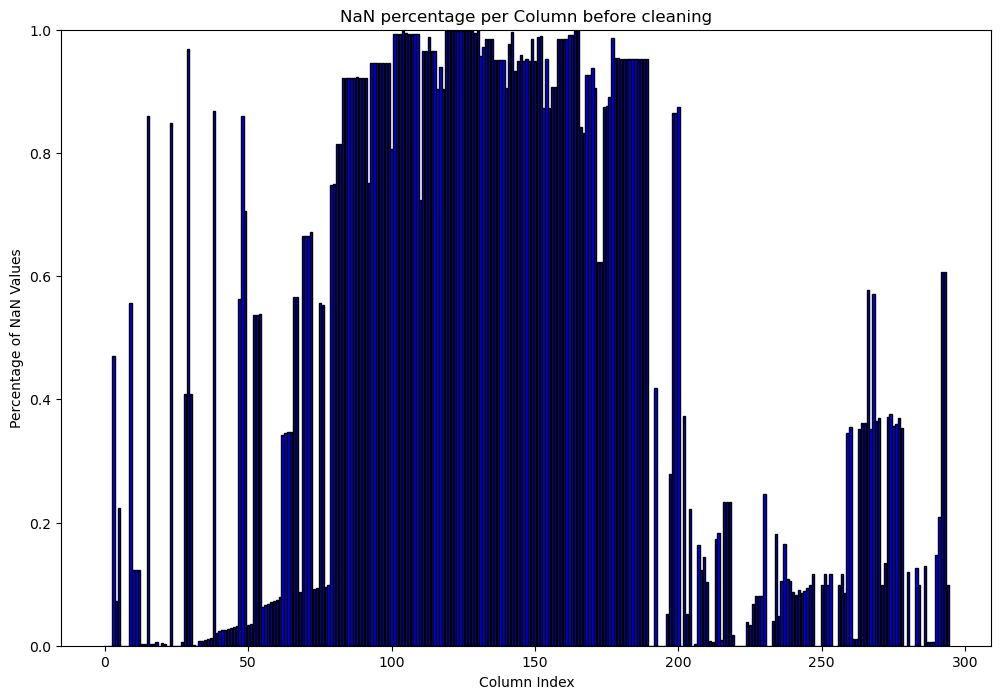

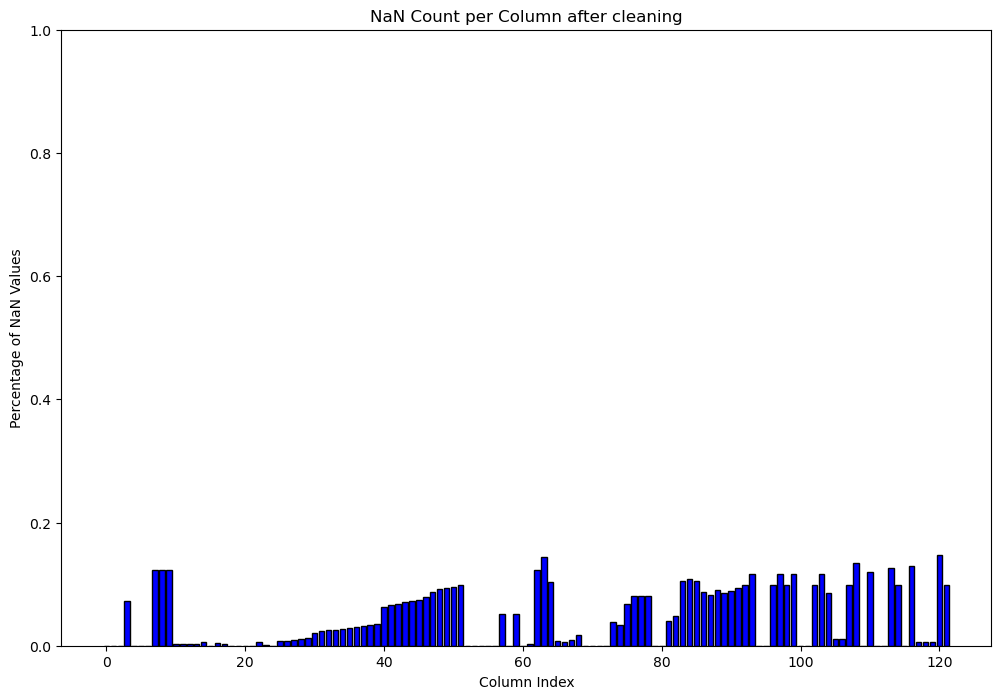

Done


In [5]:
x_train_clean,filter= data_cleaning(x_train_resampled)
print("Done")

Continuous columns :[1, 2, 28, 29, 39, 40, 41, 42, 43, 44, 45, 47, 54, 55, 57, 59, 71, 73, 74, 75, 76, 83, 84, 86, 87, 88, 89, 90, 91, 96, 97, 105, 106, 107],34 features; Categorical columns :[0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 31, 32, 33, 34, 35, 36, 37, 38, 46, 48, 49, 50, 51, 52, 53, 56, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 77, 78, 79, 80, 81, 82, 85, 92, 93, 94, 95, 98, 99, 100, 101, 102, 103, 104, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121],88 features


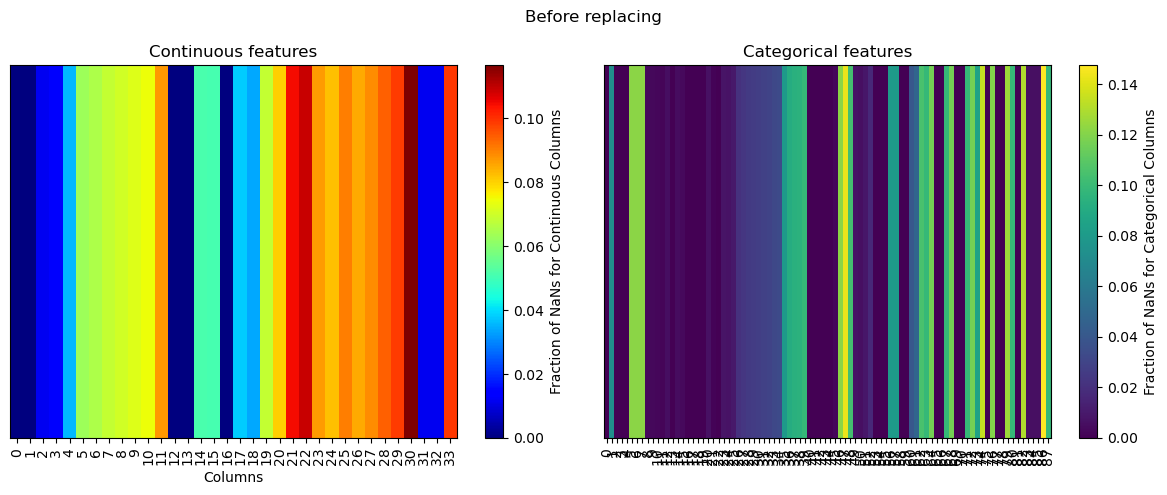

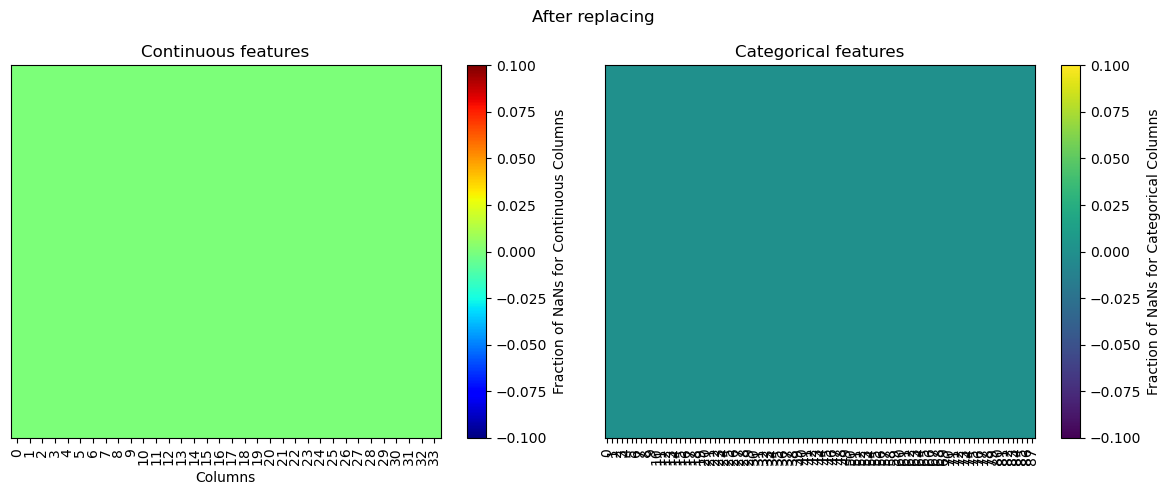

Done


In [6]:
X_train,continuous_columns,categorical_columns,mean_x,std_x,unique_categories = data_normalize(x_train_clean,split_type=True)
print("Done")

## Model Fitting and Comparison

### Comparison across models

In [7]:
tx_tr = generate_tx(X_train)
initial_w = initialize_weight(tx_tr,seed=123)


Since labels are {-1,+1}, we first map it to {0,1} for convenience.

In [8]:
y_train_resampled = (1+y_train_resampled)/2

#### Train models

Here we use five different models: gradient descendant (GD), stochastic gradient descendant (SGD), ridge regression, logistic regression and regularized logistic regression. We get the best $\gamma$ and $\lambda$ through gird search.

In [9]:
# gamma_gd = grid_search_gamma(y_train_resampled,tx_tr,initial_w,method='GD')
# gamma_sgd = grid_search_gamma(y_train_resampled,tx_tr,initial_w,method='SGD')
# gamma_lr = grid_search_gamma(y_train_resampled,tx_tr,initial_w,method='LogisticRegression')
# gamma_rlr = grid_search_gamma(y_train_resampled,tx_tr,initial_w,method='RegLogisticRegression')

In [10]:
# lambda_rr = grid_search_lambda(y_train_resampled,tx=tx_tr,method='RidgeRegression')
# lambda_rlr = grid_search_lambda(y_train_resampled,tx=tx_tr,method='RegLogisticRegression',initial_w=initial_w,gamma=gamma_rlr)

We then use 4-fold cross validation to evaluate the performance of different models.

In [11]:
# models = ["GD", "SGD", "RidgeRegression","LogisticRegression","RegLogisticRegression"]

# gammas = [gamma_gd, gamma_sgd, gamma_lr, gamma_rlr]
# lambdas = [lambda_rr, lambda_rlr]
# accuracy_m = [cross_validate(y_train_resampled, tx_tr, method=model,initial_w=initial_w, gammas=gammas, lambdas=lambdas)[0] for i, model in enumerate(models)]
# precision_m = [cross_validate(y_train_resampled, tx_tr , method=model,initial_w=initial_w, gammas=gammas, lambdas=lambdas)[1] for model in models]
# f1_score_m = [cross_validate(y_train_resampled, tx_tr, method=model,initial_w=initial_w, gammas=gammas, lambdas=lambdas)[2] for model in models]
# w = [cross_validate(y_train_resampled, tx_tr, method=model, initial_w=initial_w, gammas=gammas, lambdas=lambdas)[3] for model in models]

initial_w = initialize_weight(tx_tr,seed=123)

w, loss_tr = logistic_regression(y=y_train_resampled, tx=tx_tr, initial_w=initial_w, max_iters=1000, gamma=0.01)
print("Done")
# # Combine metrics into a single structure for plotting
# metrics_data = {
#     'Accuracy': accuracy_m,
#     'Precision': precision_m,
#     'F1 Score': f1_score_m
# }

C:\Users\nzian\Downloads\ML-Project1-zhiyan-test\ML-Project1-zhiyan-test\implementations.py:40: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-t))
C:\Users\nzian\Downloads\ML-Project1-zhiyan-test\ML-Project1-zhiyan-test\implementations.py:55: RuntimeWarning: divide by zero encountered in log
  y.T @ np.log(pred_probs) + (np.ones((1, N)) - y.T) @ np.log(1 - pred_probs)
C:\Users\nzian\Downloads\ML-Project1-zhiyan-test\ML-Project1-zhiyan-test\implementations.py:55: RuntimeWarning: invalid value encountered in matmul
  y.T @ np.log(pred_probs) + (np.ones((1, N)) - y.T) @ np.log(1 - pred_probs)


Done


In [12]:
# fig, axs = plt.subplots(3, 1, figsize=(10, 18)) 


# for i, (metric, scores) in enumerate(metrics_data.items()):
    
#     axs[i].boxplot(scores, labels=models)

    
#     means = [np.mean(score) for score in scores]
#     stds = [np.std(score) for score in scores]

#     #
#     axs[i].errorbar(range(1, len(models) + 1), means, yerr=stds, fmt='o', color='red', label='Mean ± Std')

    
#     for j, mean in enumerate(means):
#         axs[i].annotate(f'{mean:.2f}', xy=(j + 1, mean), 
#                         textcoords='offset points', 
#                         xytext=(0, 5), 
#                         ha='center', color='black')

#     axs[i].set_title(f'Comparison of {metric}')
#     axs[i].set_ylabel('Scores')
#     axs[i].grid(axis='y')
#     axs[i].legend()


# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

## Prediction

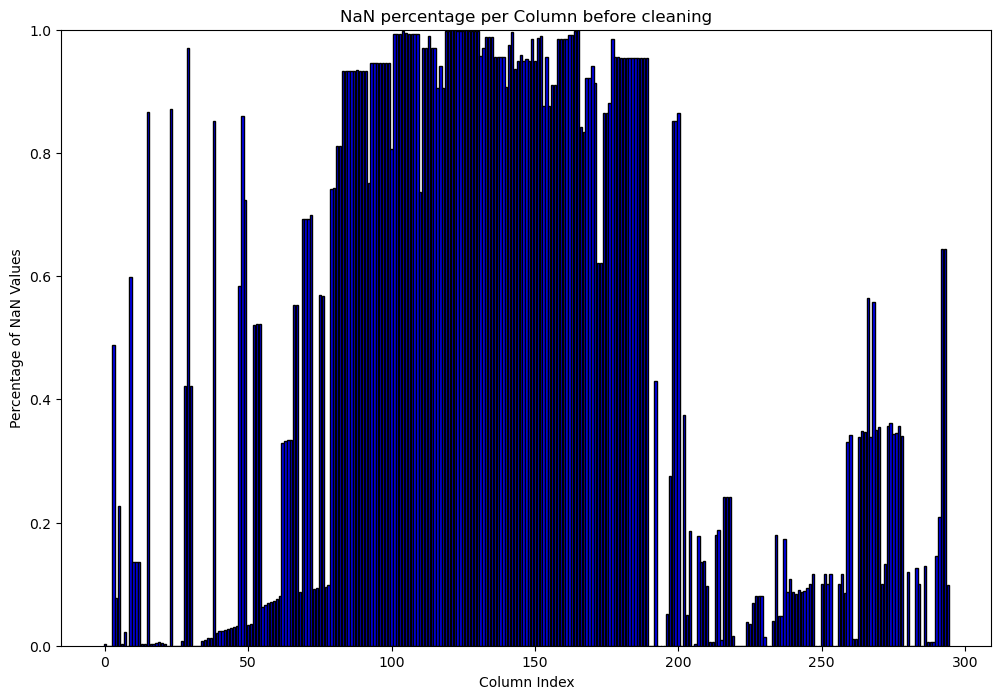

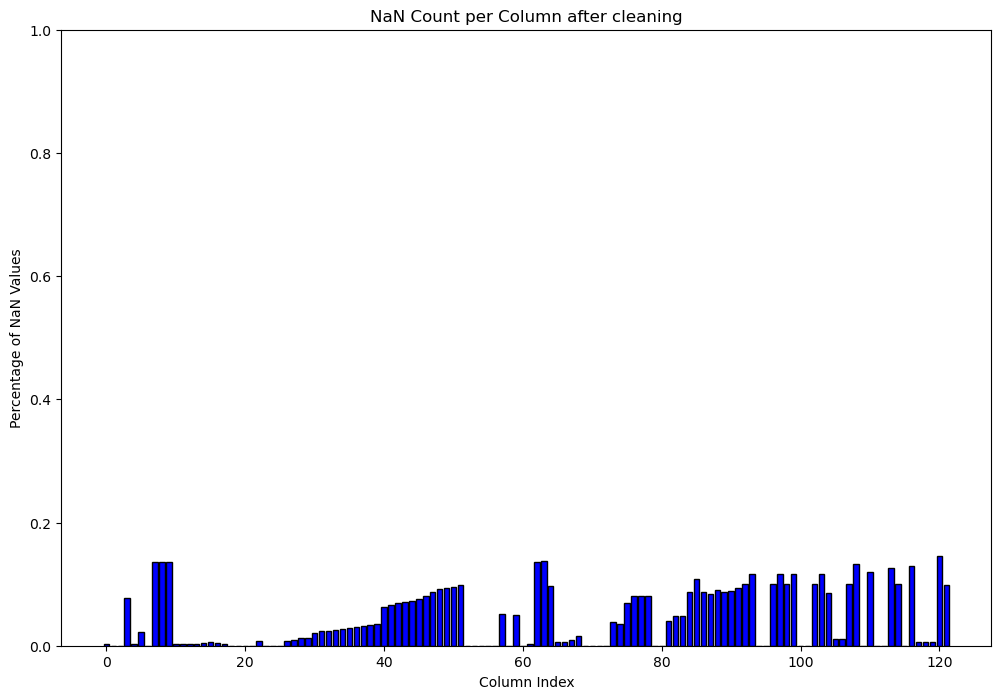

In [17]:
x_test_clean,_ = data_cleaning(x_test,columns_to_delete=filter)

In [18]:
x_test_continuous = x_test_clean[:, continuous_columns]
x_test_categorical = x_test_clean[:, categorical_columns]

x_test_cont_filled = fill_missing_value(x_test_continuous)
x_test_cat_filled = fill_missing_value(x_test_categorical,data_type='catagorical')


x_test_standardized = (x_test_cont_filled - mean_x) / std_x
x_test_onehot = one_hot_encode(x_test_cat_filled, unique_categories)

tx_te = generate_tx(np.hstack((x_test_standardized, x_test_onehot)))

In [19]:

# Calculate probability prediction, insert the corresponding w
# probabilities_pred = sigmoid(tx_te @ w[models=="LogisticRegression"]) # Sigmoid is logistic regression
probabilities_pred = sigmoid(tx_te @ w) # Sigmoid is logistic regression

# Convert probabilities to binary labels
y_pred = np.where(probabilities_pred >= 0.5, 1, -1)   # 0.5 if sigmoid

print(y_pred)
print(y_pred.shape)
print(np.unique(y_pred))
print("Unhealthy :", np.sum(y_pred == 1)/len(y_pred) * 100, "%")

[-1 -1 -1 ...  1  1 -1]
(109379,)
[-1  1]
Unhealthy : 16.484882838570474 %


In [20]:
ids = []

for n in range(y_pred.shape[0]):
    ids.append(328135 + n)

create_csv_submission(ids, y_pred, "submission-logistic_regerssion.csv")